## Observations and Insights 

In [4]:
! explorer ..

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
combined_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
number_of_mice = len(mouse_metadata["Mouse ID"])
number_of_mice


249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = dup_mouse.drop_duplicates()
dup_mouse_id


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Mouse_DF = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] != 'g989']     
Clean_Mouse_DF = pd.DataFrame(Clean_Mouse_DF)
Clean_Mouse_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_of_mice = Clean_Mouse_DF["Mouse ID"].value_counts()
clean_of_mice

s565    10
r811    10
i177    10
o287    10
m650    10
        ..
n482     1
f932     1
h428     1
b447     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
Clean_Mouse_DF.describe()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_stats = Clean_Mouse_DF[['Drug Regimen', 'Tumor Volume (mm3)']]

tumor_df = tumor_volume_stats.groupby(["Drug Regimen"]).mean()
tumor_df = tumor_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_df['Std. Dev. Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).std()
tumor_df['Median Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).median()
tumor_df['Variance Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).var()
tumor_df['SEM Tumor Volume'] = tumor_volume_stats.groupby(["Drug Regimen"]).sem()
tumor_df

,Mean Tumor Volume,Std. Dev. Tumor Volume,Median Tumor Volume,Variance Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.320930,6.622085,50.446266,43.852013,0.544332
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_treatment_df = Clean_Mouse_DF.groupby(['Drug Regimen']).count()['Mouse ID']
mice_per_treatment_df


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

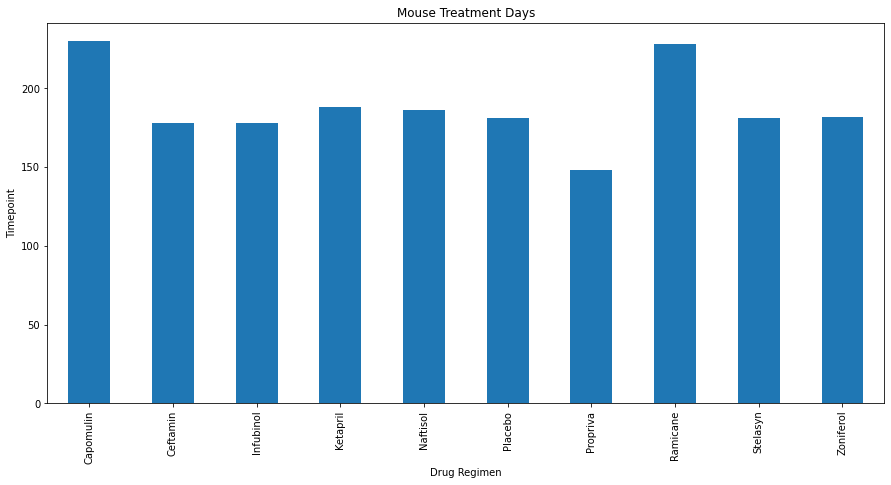

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_per_treatment_df.plot(kind="bar", figsize=(15,7))

plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.show()
plt.tight_layout()


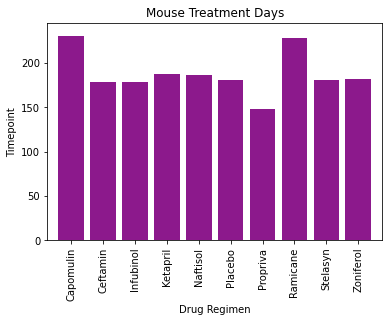

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
days = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

treatment = np.arange(len(mice_per_treatment_df))
tick_locations = []
for x in treatment:
    tick_locations.append(x)
    
plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.xlim(-0.75, len(treatment)-0.25)
plt.ylim(0, max(days) + 15)

plt.bar(treatment, days, facecolor="purple", alpha=0.90, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.show()


In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = Clean_Mouse_DF.groupby(['Sex', 'Mouse ID']).size()
gender_pie = pd.DataFrame(gender_pie.groupby(['Sex']).count())
gender_pie.columns = ['Total Gender Count']
gender_pie['% of Gender'] = (100*(gender_pie['Total Gender Count']/gender_pie['Total Gender Count'].sum()))
gender_pie


,Total Gender Count,% of Gender
Sex,,
Female,123,49.596774
Male,125,50.403226


## Quartiles, Outliers and Boxplots

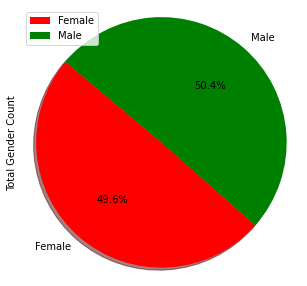

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


labels = ["Female", "Male"]
colors = ["red", "green"]
explode = (0.1, 0)


plot = gender_pie.plot.pie(y='Total Gender Count', figsize=(5, 5), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plot.legend(loc="upper left")
plot.axis("equal")
plt.show()


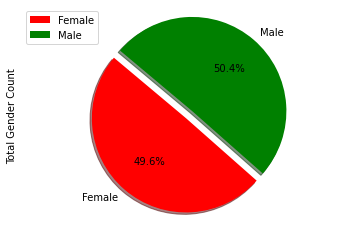

In [30]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
    
labels = ["Female", "Male"]
percent = [49.596774, 50.403226]
colors = ["red", "green"]
explode = (0.1, 0)


plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend(loc="best")
plt.ylabel("Total Gender Count")
plt.axis("equal")
plt.show()

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_4_drugs = Clean_Mouse_DF[Clean_Mouse_DF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_4_drugs = top_4_drugs.sort_values(["Timepoint"], ascending=True)
top_4_drugs_final = top_4_drugs[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
top_4_drugs_finals = pd.DataFrame(top_4_drugs_final)
top_4_drugs_finals.reset_index()

,index,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,0,Capomulin,b128,45.000000
1,221,Ceftamin,q483,45.000000
2,220,Ceftamin,o287,45.000000
3,219,Ceftamin,b487,45.000000
4,218,Ceftamin,p438,45.000000
...,...,...,...,...
809,1802,Infubinol,e476,62.435404
810,1804,Infubinol,a203,67.973419
811,1806,Infubinol,f345,60.918767
812,1810,Ceftamin,l471,67.748662


## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoint_vs_tumorvol = Clean_Mouse_DF[Clean_Mouse_DF['Mouse ID']=='l509'] 
timepoint_vs_tumorvol_final = timepoint_vs_tumorvol[["Drug Regimen", "Mouse ID", "Timepoint", "Weight (g)", "Tumor Volume (mm3)"]]
timepoint_vs_tumorvol_final = pd.DataFrame(timepoint_vs_tumorvol_final)   
timepoint_vs_tumorvol_final

,Drug Regimen,Mouse ID,Timepoint,Weight (g),Tumor Volume (mm3)
231,Capomulin,l509,0,21,45.000000
253,Capomulin,l509,5,21,45.851193
539,Capomulin,l509,10,21,46.759074
881,Capomulin,l509,15,21,47.488599
982,Capomulin,l509,20,21,48.070452
1146,Capomulin,l509,25,21,44.006257
1414,Capomulin,l509,30,21,44.708055
1499,Capomulin,l509,35,21,40.207289
1723,Capomulin,l509,40,21,40.770813
1771,Capomulin,l509,45,21,41.483008


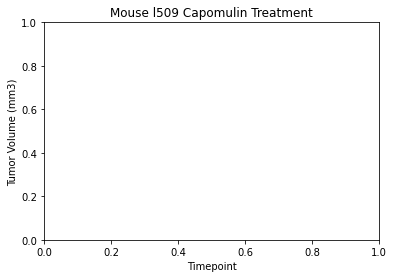

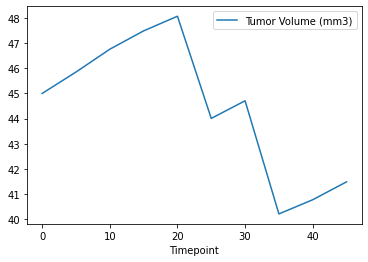

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo_lineplot_data = timepoint_vs_tumorvol_final[["Timepoint", "Tumor Volume (mm3)"]]
Capo_lineplot_data

# Plot the line chart
plt.title("Mouse l509 Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Capo_lineplot_data = Capo_lineplot_data.plot(kind='line', x='Timepoint', y ='Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

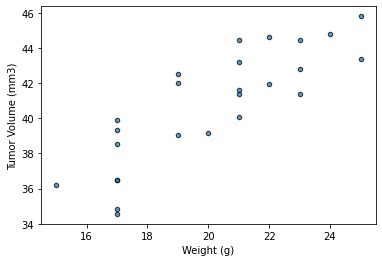

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_mw_vs_tmvol = Clean_Mouse_DF.loc[Clean_Mouse_DF['Drug Regimen']== 'Capomulin']
scatter_mw_vs_tmvol_df = scatter_mw_vs_tmvol.groupby('Mouse ID').mean()
scatter_mw_vs_tmvol_df_final = pd.DataFrame(scatter_mw_vs_tmvol_df)
scatter_mw_vs_tmvol_df_final

Capomulin_scat = scatter_mw_vs_tmvol_df.plot(kind='scatter', x='Weight (g)', y ='Tumor Volume (mm3)', facecolors="red", edgecolors="black", alpha=0.75)
plt.show()

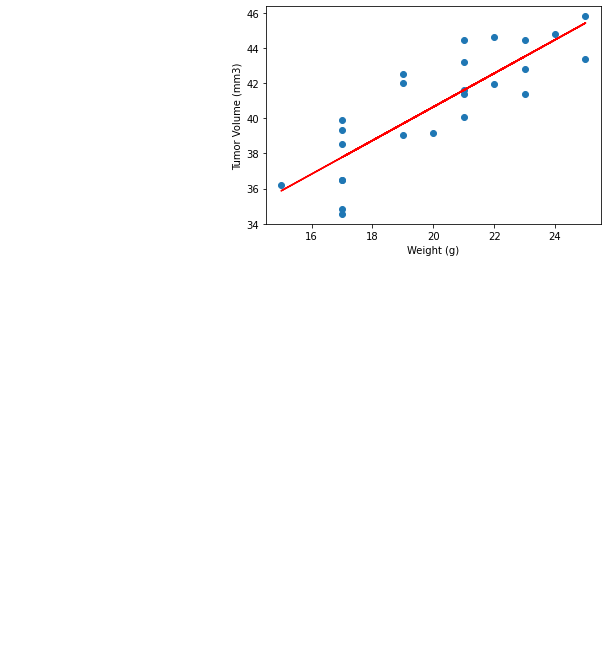

In [26]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. 
#Plot the linear regression model on top of the previous scatter plot.
# https://www.w3schools.com/python/python_ml_linear_regression.asp - used this to import linregress
from matplotlib import pyplot as plt
from scipy.stats import linregress

x_values = scatter_mw_vs_tmvol_df_final["Weight (g)"]
y_values = scatter_mw_vs_tmvol_df_final["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()